In [ ]:
#data cleaning and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # plotting

In [ ]:
data_train = pd.read_csv('UNSW_NB15_training-set.csv')

In [ ]:
data_train.head(5)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
data_train.drop('id',axis=1,inplace=True)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:
data_train[data_train['service']=='-']

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0
5,0.380537,tcp,-,FIN,10,6,534,268,39.417980,254,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,0.653375,tcp,-,FIN,10,8,564,354,26.018748,254,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,0.695566,tcp,-,FIN,10,8,564,354,24.440528,254,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,62,...,1,1,0,0,0,1,1,0,Exploits,1
175277,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,62,...,1,1,0,0,0,2,1,0,Exploits,1


In [ ]:
data_train['service'].value_counts()

,count
service,
-,94168
dns,47294
http,18724
smtp,5058
ftp-data,3995
ftp,3428
ssh,1302
pop3,1105
dhcp,94


In [ ]:
data_train['service'] = data_train['service'].apply(lambda x:"None" if x=="-" else x)

In [ ]:
data_train['service'].value_counts()

,count
service,
None,94168
dns,47294
http,18724
smtp,5058
ftp-data,3995
ftp,3428
ssh,1302
pop3,1105
dhcp,94


In [ ]:
data_train.isnull().sum()

,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0
sttl,0


In [ ]:
data_train.isnull().sum().sum()

np.int64(0)

In [ ]:
data_train_0, data_train_1 = data_train['label'].value_counts()[0] / len(data_train.index), data_train['label'].value_counts()[1] / len(data_train.index)

print("In Train: there are {} % of class 0 and {} % of class 1".format(data_train_0, data_train_1))

In Train: there are 0.3193776697977085 % of class 0 and 0.6806223302022916 % of class 1


Text(0.5, 1.0, 'class distribution of train dataset')

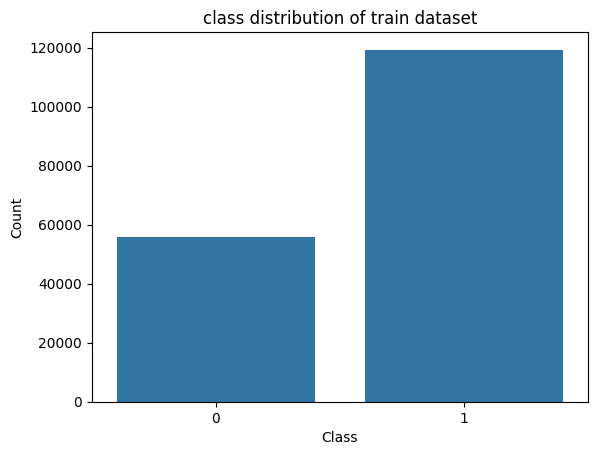

In [ ]:
ax = sns.countplot(x='label', data=data_train)
ax.set(xlabel="Class", ylabel="Count")
plt.title("class distribution of train dataset")

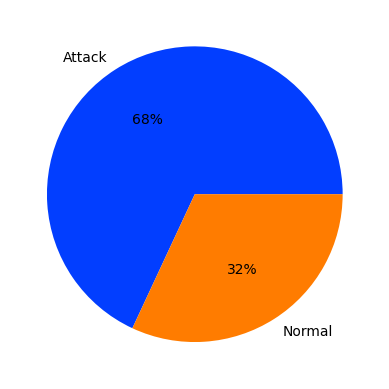

In [ ]:
#define data
data = data_train['label'].value_counts()
labels = ['Attack', 'Normal']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
data_train.shape

(175341, 44)

In [ ]:
data_train.dtypes.value_counts()

,count
int64,29
float64,11
object,4


In [ ]:
data_train['attack_cat'].value_counts()

,count
attack_cat,
Normal,56000
Generic,40000
Exploits,33393
Fuzzers,18184
DoS,12264
Reconnaissance,10491
Analysis,2000
Backdoor,1746
Shellcode,1133


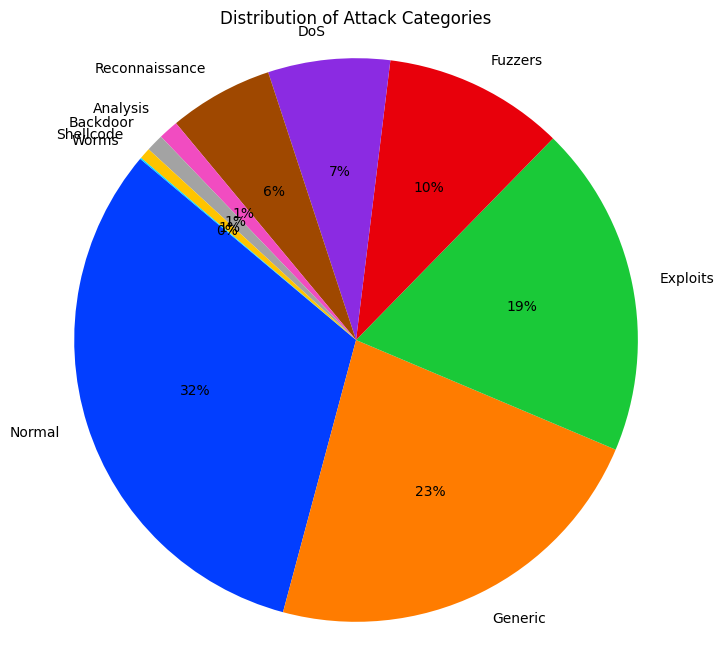

In [ ]:
# Define data
data = data_train['attack_cat'].value_counts()
labels = data.index.tolist()

# Define Seaborn color palette
colors = sns.color_palette('bright')[0:len(labels)]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=140)
plt.title('Distribution of Attack Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
data_train['state'].value_counts()

,count
state,
INT,82275
FIN,77825
CON,13152
REQ,1991
RST,83
ECO,12
PAR,1
URN,1
no,1


In [ ]:
data_train['proto'].value_counts()

,count
proto,
tcp,79946
udp,63283
unas,12084
arp,2859
ospf,2595
...,...
argus,98
netblt,98
igmp,18


In [ ]:
data_train['proto'].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

In [ ]:
data_train['ct_ftp_cmd'].unique()

array([0, 1, 2, 4])

In [ ]:
data_train['is_sm_ips_ports'].value_counts()

,count
is_sm_ips_ports,
0,172579
1,2762


The col "is_ftp_login" has few wrong values like 2, 4. It should only have 0 and 1, If the ftp session is accessed by user and password then 1 else 0. Need to fix this.
Replacing all the values apart from 0 and 1 from these two columns to be 1s.

In [ ]:
data_train['is_ftp_login'].value_counts()

,count
is_ftp_login,
0,172774
1,2545
4,16
2,6


In [ ]:
data_train['is_ftp_login'] = np.where(data_train['is_ftp_login']>1, 1, data_train['is_ftp_login'])

In [ ]:
data_train['is_ftp_login'].value_counts()

,count
is_ftp_login,
0,172774
1,2567


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [ ]:
data_train['label'].value_counts()

,count
label,
1,119341
0,56000


In [ ]:
X_train=data_train.drop(columns=['attack_cat','label'],axis=1)

y1_train=data_train['attack_cat'].copy()
y2_train=data_train['label'].copy()

In [ ]:
# Load test data
data_test = pd.read_csv('UNSW_NB15_testing-set.csv')
X_test = data_test.drop(axis=1, columns=['attack_cat','label']) # X_test is a dataframe

y1_test = data_test['attack_cat'].values # y is an array
y2_test = data_test['label'].values

In [ ]:
# determine categorical and numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [ ]:
numerical_cols

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [ ]:
categorical_cols

Index(['proto', 'service', 'state'], dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [ ]:
num_pipeline = Pipeline([
    ("standardize", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("oneHot", OneHotEncoder(drop='first', handle_unknown='ignore')),
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols),
])

In [ ]:
X_train_prepared=preprocessing.fit_transform(X_train)

In [ ]:
import joblib
joblib.dump(preprocessing, "preprocessing_pipeline.joblib")

['preprocessing_pipeline.joblib']

In [ ]:
X_test_prepared=preprocessing.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_train_prepared.shape

(175341, 191)

In [ ]:
numerical_feature_names = np.array(numerical_cols)
categorical_feature_names = preprocessing.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])


In [ ]:
all_feature_names

array(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'proto_a/n', 'proto_aes-sp3-d',
       'proto_any', 'proto_argus', 'proto_aris', 'proto_arp',
       'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon',
       'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer',
       'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp',
       'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp',
       'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip',
       'proto_fc', 'proto_fire', 'proto_ggp',

In [ ]:
X_test_prepared.shape

(82332, 191)

In [ ]:
# Note that the distinct values/labels in `y2` target are 1 and 2.
pd.unique(y1_train)

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [ ]:
pd.unique(y2_train)

array([0, 1])

In [ ]:
target_trans = LabelEncoder()
y2_train_prepared = target_trans.fit_transform(y2_train)
y2_test_prepared = target_trans.transform(y2_test)


In [ ]:
y2_train_prepared.shape

(175341,)

In [ ]:
y2_test_prepared.shape

(82332,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
feature_names = np.concatenate([numerical_feature_names, categorical_feature_names])
feature_names

array(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt',
       'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'proto_a/n', 'proto_aes-sp3-d',
       'proto_any', 'proto_argus', 'proto_aris', 'proto_arp',
       'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon',
       'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer',
       'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp',
       'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp',
       'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip',
       'proto_fc', 'proto_fire', 'proto_ggp',

In [ ]:
DTclf2 = DecisionTreeClassifier(criterion="entropy", max_depth=12, min_samples_split=10, min_samples_leaf=5,
                                max_features=0.8, ccp_alpha=0.001,
                                class_weight="balanced", random_state=42)
DTclf2.fit(X_train_prepared, y2_train_prepared)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       criterion='entropy', max_depth=12, max_features=0.8,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
import joblib

# Save the model to a file
joblib.dump(DTclf2, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

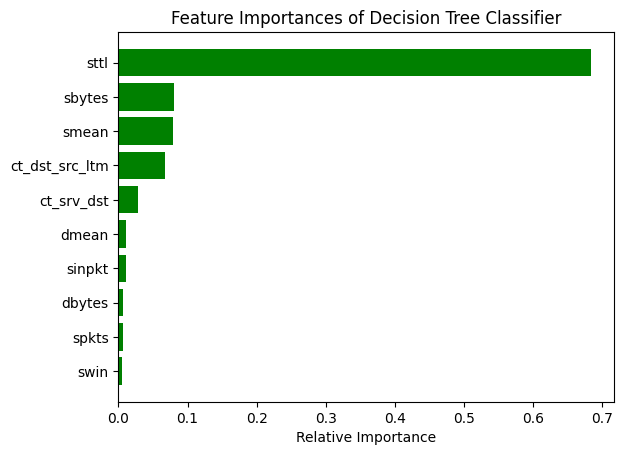

In [ ]:
importances = DTclf2.feature_importances_
indices = np.argsort(importances)
features = np.concatenate([numerical_feature_names, categorical_feature_names])
plt.title('Feature Importances of Decision Tree Classifier')
count = 10 # top # importance
plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
DTclf2.feature_importances_

array([0.        , 0.00650084, 0.00393538, 0.08101047, 0.00703459,
       0.        , 0.68349459, 0.        , 0.        , 0.        ,
       0.0046044 , 0.        , 0.01114341, 0.        , 0.        ,
       0.        , 0.00503692, 0.        , 0.        , 0.        ,
       0.00204255, 0.00186018, 0.        , 0.07913831, 0.01153579,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00214772, 0.06785791, 0.        , 0.        ,
       0.        , 0.        , 0.02883506, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00382188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

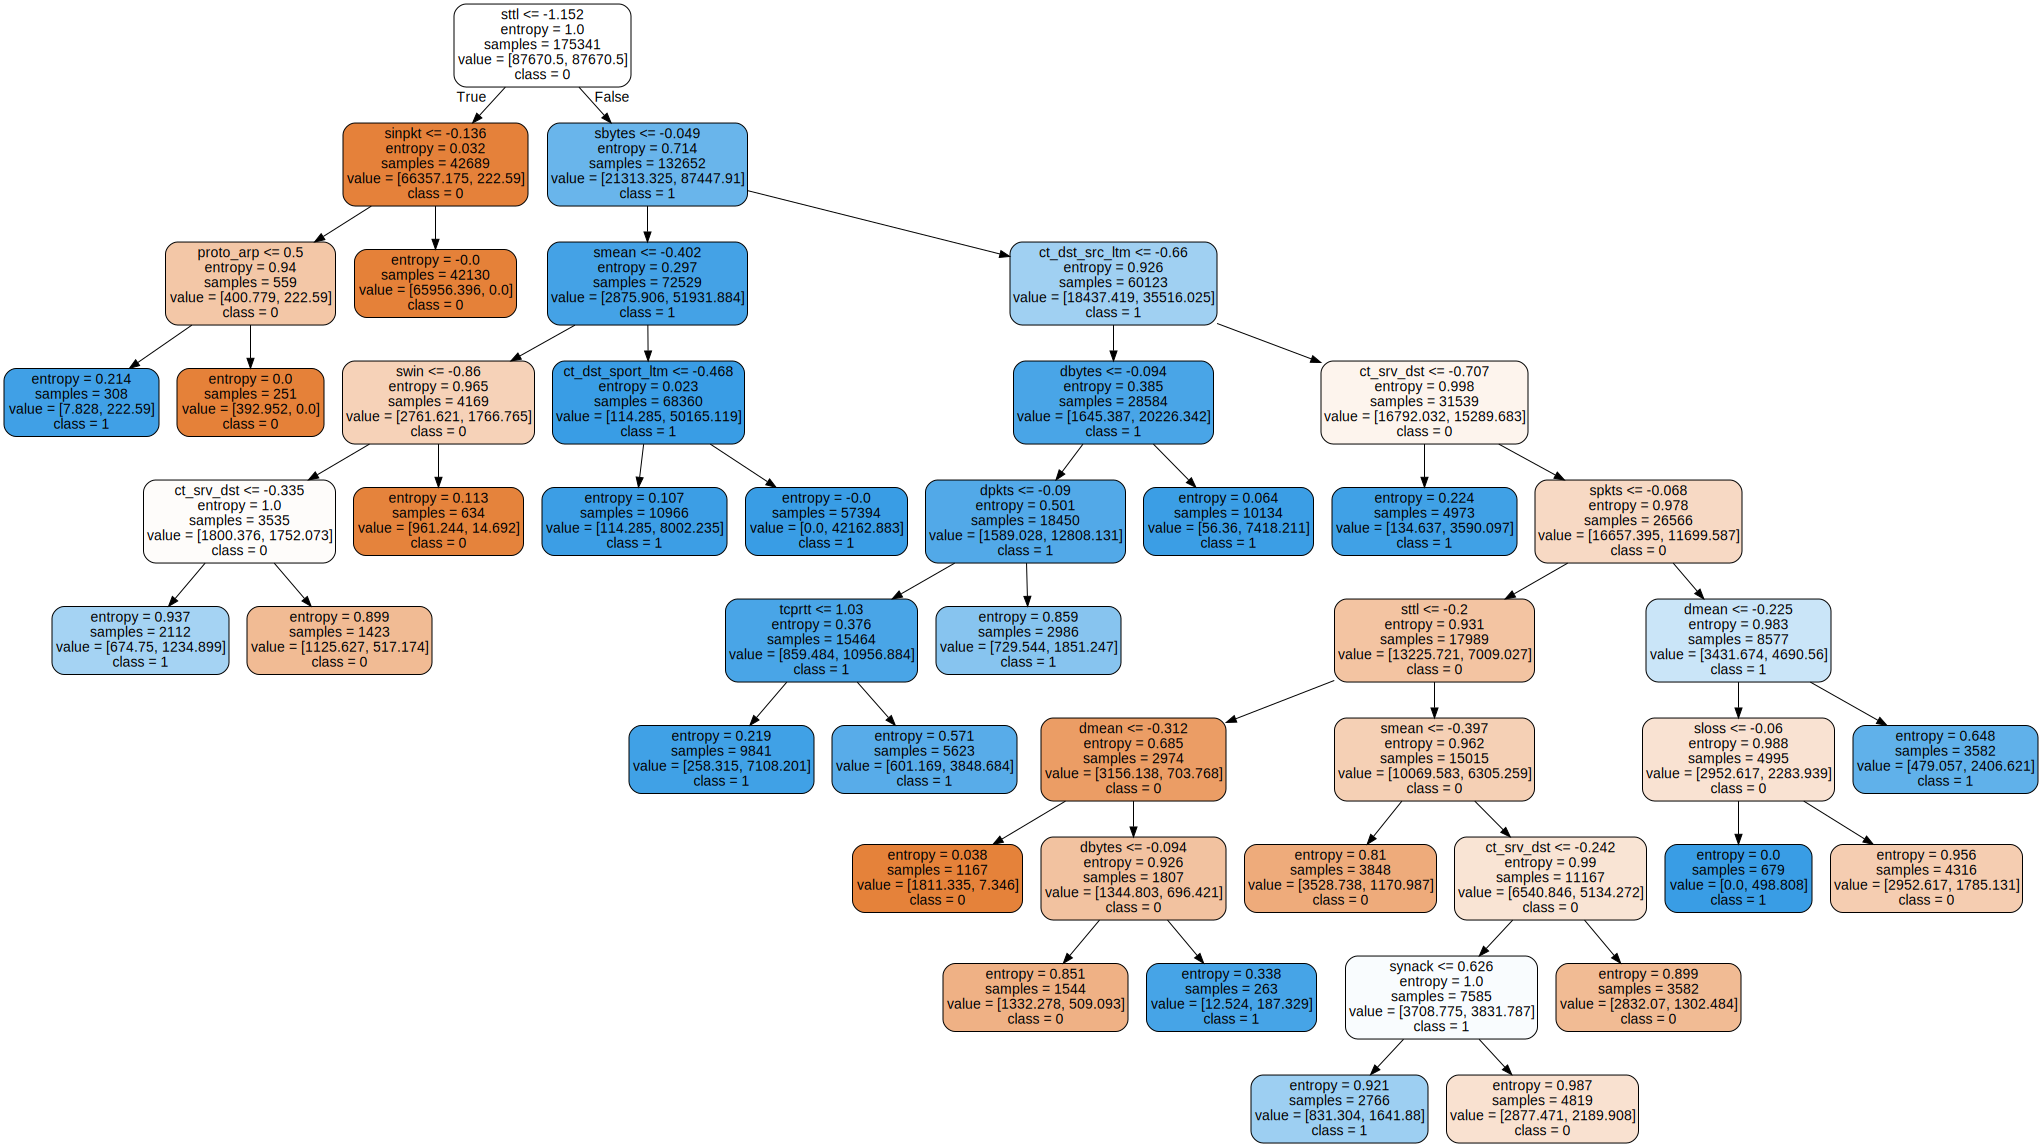

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        DTclf2,
        out_file=str("DTclf2.dot"),
        feature_names=np.concatenate([numerical_feature_names, categorical_feature_names]),
        class_names=['0','1'],
        rounded=True,
        filled=True
    )
from graphviz import Source

Source.from_file("DTclf2.dot")

In [ ]:
y2_pred_train2=DTclf2.predict(X_train_prepared)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_train_prepared, y2_pred_train2))

report=metrics.classification_report(y2_train_prepared, y2_pred_train2)

DTclf_name=['Decision Tree Classifer','RegLog']

print('Reporting for %s:'%DTclf_name)

print(report)

Accuracy: 0.9275925197187195
Reporting for ['Decision Tree Classifer', 'RegLog']:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     56000
           1       0.98      0.91      0.95    119341

    accuracy                           0.93    175341
   macro avg       0.91      0.94      0.92    175341
weighted avg       0.93      0.93      0.93    175341



In [ ]:
y2_pred_test2=DTclf2.predict(X_test_prepared)

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_test_prepared, y2_pred_test2))

report=metrics.classification_report(y2_test_prepared, y2_pred_test2)

DTclf_name=['Decision Tree Classifer','RegLog']

print('Reporting for %s:'%DTclf_name)

print(report)

Accuracy: 0.9122698343293009
Reporting for ['Decision Tree Classifer', 'RegLog']:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     37000
           1       0.90      0.95      0.92     45332

    accuracy                           0.91     82332
   macro avg       0.91      0.91      0.91     82332
weighted avg       0.91      0.91      0.91     82332



In [ ]:
# ===== cross-validation ========
# define  Stratified 5-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

#DTclf = DecisionTreeClassifier()

# define metrics for evaluating
scoring = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']

# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=DTclf2,
                            X=X_train_prepared,
                            y=y2_train_prepared,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [ ]:
cv_results

{'fit_time': array([4.4251399 , 3.62191296, 3.90445662, 4.30491233, 3.75767589]),
 'score_time': array([0.05133986, 0.03390121, 0.03377342, 0.03349757, 0.03556776]),
 'test_accuracy': array([0.93435798, 0.92973651, 0.92682788, 0.92198015, 0.93204631]),
 'test_precision_micro': array([0.93435798, 0.92973651, 0.92682788, 0.92198015, 0.93204631]),
 'test_recall_micro': array([0.93435798, 0.92973651, 0.92682788, 0.92198015, 0.93204631]),
 'test_f1_micro': array([0.93435798, 0.92973651, 0.92682788, 0.92198015, 0.93204631]),
 'test_roc_auc_ovr': array([0.98750788, 0.98628108, 0.98636663, 0.98604296, 0.98720016])}

In [ ]:
# ======== Evaluate the model using testing data =======
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
# fit the Logistic Regression model
DTclf2.fit(X=X_train_prepared, y=y2_train_prepared)

# predition on testing data
y_pred_class = DTclf2.predict(X=X_test_prepared)
y_pred_score = DTclf2.predict_proba(X=X_test_prepared)[:, 1]

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y2_test_prepared, y_score=y_pred_score)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y2_test_prepared, y_pred=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y2_test_prepared, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y2_test_prepared, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y2_test_prepared, y_pred=y_pred_class)

# print the above results
print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
# Print classification report:
print('Classification Report:\n', cls_report_ontest)

The model scores 0.97804 ROC AUC on the test set.
The precision score on the test set: 0.89834
The recall score on the test set: 0.94794
Confusion Matrix:
 [[32137  4863]
 [ 2360 42972]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90     37000
           1       0.90      0.95      0.92     45332

    accuracy                           0.91     82332
   macro avg       0.91      0.91      0.91     82332
weighted avg       0.91      0.91      0.91     82332



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=12,
                                 min_samples_split=10, min_samples_leaf=5,
                                 max_features=0.8, class_weight='balanced',
                                 n_jobs=-1, random_state=42) #default is bootstrap=True means we are doing bagging and when we change it to flase we are doing pasting.
rnd_clf.fit(X_train_prepared, y2_train_prepared)


RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=0.8,
                       min_samples_leaf=5, min_samples_split=10, n_jobs=-1,
                       random_state=42)

In [ ]:
import joblib

# Save the model to a file
joblib.dump(rnd_clf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
for score, name in zip(rnd_clf.feature_importances_, feature_names):
    print(round(score, 2), name)

0.0 dur
0.0 spkts
0.0 dpkts
0.08 sbytes
0.01 dbytes
0.0 rate
0.52 sttl
0.0 dttl
0.0 sload
0.02 dload
0.01 sloss
0.0 dloss
0.0 sinpkt
0.0 dinpkt
0.0 sjit
0.0 djit
0.0 swin
0.0 stcpb
0.0 dtcpb
0.0 dwin
0.0 tcprtt
0.01 synack
0.0 ackdat
0.04 smean
0.01 dmean
0.0 trans_depth
0.0 response_body_len
0.01 ct_srv_src
0.14 ct_state_ttl
0.0 ct_dst_ltm
0.0 ct_src_dport_ltm
0.0 ct_dst_sport_ltm
0.03 ct_dst_src_ltm
0.0 is_ftp_login
0.0 ct_ftp_cmd
0.0 ct_flw_http_mthd
0.0 ct_src_ltm
0.07 ct_srv_dst
0.0 is_sm_ips_ports
0.0 proto_a/n
0.0 proto_aes-sp3-d
0.0 proto_any
0.0 proto_argus
0.0 proto_aris
0.0 proto_arp
0.0 proto_ax.25
0.0 proto_bbn-rcc
0.0 proto_bna
0.0 proto_br-sat-mon
0.0 proto_cbt
0.0 proto_cftp
0.0 proto_chaos
0.0 proto_compaq-peer
0.0 proto_cphb
0.0 proto_cpnx
0.0 proto_crtp
0.0 proto_crudp
0.0 proto_dcn
0.0 proto_ddp
0.0 proto_ddx
0.0 proto_dgp
0.0 proto_egp
0.0 proto_eigrp
0.0 proto_emcon
0.0 proto_encap
0.0 proto_etherip
0.0 proto_fc
0.0 proto_fire
0.0 proto_ggp
0.0 proto_gmtp
0.0 prot

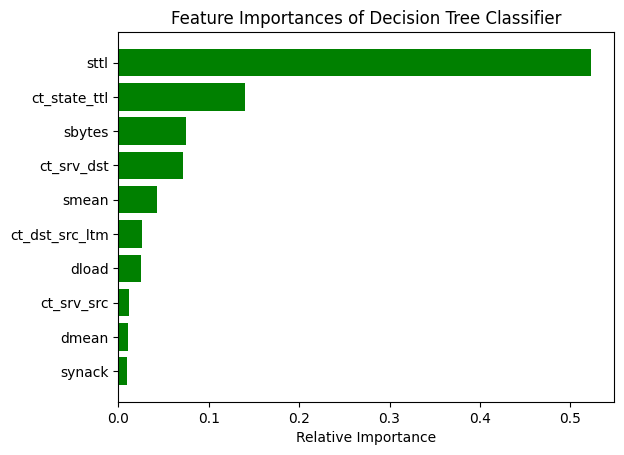

In [ ]:
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
features = np.concatenate([numerical_feature_names, categorical_feature_names])
plt.title('Feature Importances of Decision Tree Classifier')
count = 10 # top # importance
plt.barh(range(count), importances[indices][len(indices)-count:], color='g', align='center')
plt.yticks(range(count), [features[i] for i in indices[len(indices)-count:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
y2_pred_rf_train = rnd_clf.predict(X_train_prepared)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y2_train_prepared, y2_pred_rf_train))

report=metrics.classification_report(y2_train_prepared, y2_pred_rf_train)

RNDclf_name=['Random Forest Classifer','RegLog']

print('Reporting for %s:'%RNDclf_name)

print(report)

Accuracy: 0.948557382471869
Reporting for ['Random Forest Classifer', 'RegLog']:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     56000
           1       0.98      0.94      0.96    119341

    accuracy                           0.95    175341
   macro avg       0.93      0.95      0.94    175341
weighted avg       0.95      0.95      0.95    175341



In [ ]:
y2_pred_rf_test = rnd_clf.predict(X_test_prepared)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y2_test_prepared, y2_pred_rf_test))

report=metrics.classification_report(y2_test_prepared, y2_pred_rf_test)

RNDclf_name=['Random Forest Classifer','RegLog']

print('Reporting for %s:'%RNDclf_name)

print(report)

Accuracy: 0.9166909585580333
Reporting for ['Random Forest Classifer', 'RegLog']:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90     37000
           1       0.89      0.97      0.93     45332

    accuracy                           0.92     82332
   macro avg       0.92      0.91      0.91     82332
weighted avg       0.92      0.92      0.92     82332



In [ ]:
from sklearn.model_selection import train_test_split
X_train_MLP, X_valid_MLP, y2_train_MLP, y_valid_MLP = train_test_split(
    X_train_prepared, y2_train_prepared, test_size=0.1, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [ ]:
tf.random.set_seed(42)

In [ ]:
import sys
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
def build_model():
    n_hidden = 3  # Number of hidden layers
    n_neurons = 64  # Neurons per layer
    learning_rate = 0.00905127409782462  # Predefined learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)  # Optimizer set to Adam

    model1 = tf.keras.Sequential()
    model1.add(tf.keras.layers.InputLayer(shape=(191,)))  # Input layer for 191 features

    for _ in range(n_hidden):
        model1.add(tf.keras.layers.Dense(n_neurons, activation="relu"))  # Hidden layers

    model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model1.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    return model1

model1 = build_model()
history = model1.fit(
    X_train_MLP, y2_train_MLP,
    epochs=10,
    batch_size=32,
    validation_data=(X_valid_MLP, y_valid_MLP)
)


Epoch 1/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9310 - loss: 0.1521 - precision_6: 0.9181 - recall_6: 0.9868 - val_accuracy: 0.9349 - val_loss: 0.1254 - val_precision_6: 0.9340 - val_recall_6: 0.9730
Epoch 2/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9386 - loss: 0.1281 - precision_6: 0.9314 - recall_6: 0.9823 - val_accuracy: 0.9356 - val_loss: 0.1234 - val_precision_6: 0.9351 - val_recall_6: 0.9727
Epoch 3/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9386 - loss: 0.1258 - precision_6: 0.9343 - recall_6: 0.9788 - val_accuracy: 0.9366 - val_loss: 0.1221 - val_precision_6: 0.9370 - val_recall_6: 0.9722
Epoch 4/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9398 - loss: 0.1210 - precision_6: 0.9445 - recall_6: 0.9686 - val_accuracy: 0.9373 - val_loss: 0.1198 - val_precision_6: 0.9314 - val_recall_6: 0.9800
Epoch 5/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9404 - loss: 0.1211 - precision_6: 0.9371 - rec

In [ ]:
model1.save('mlp_model.h5')

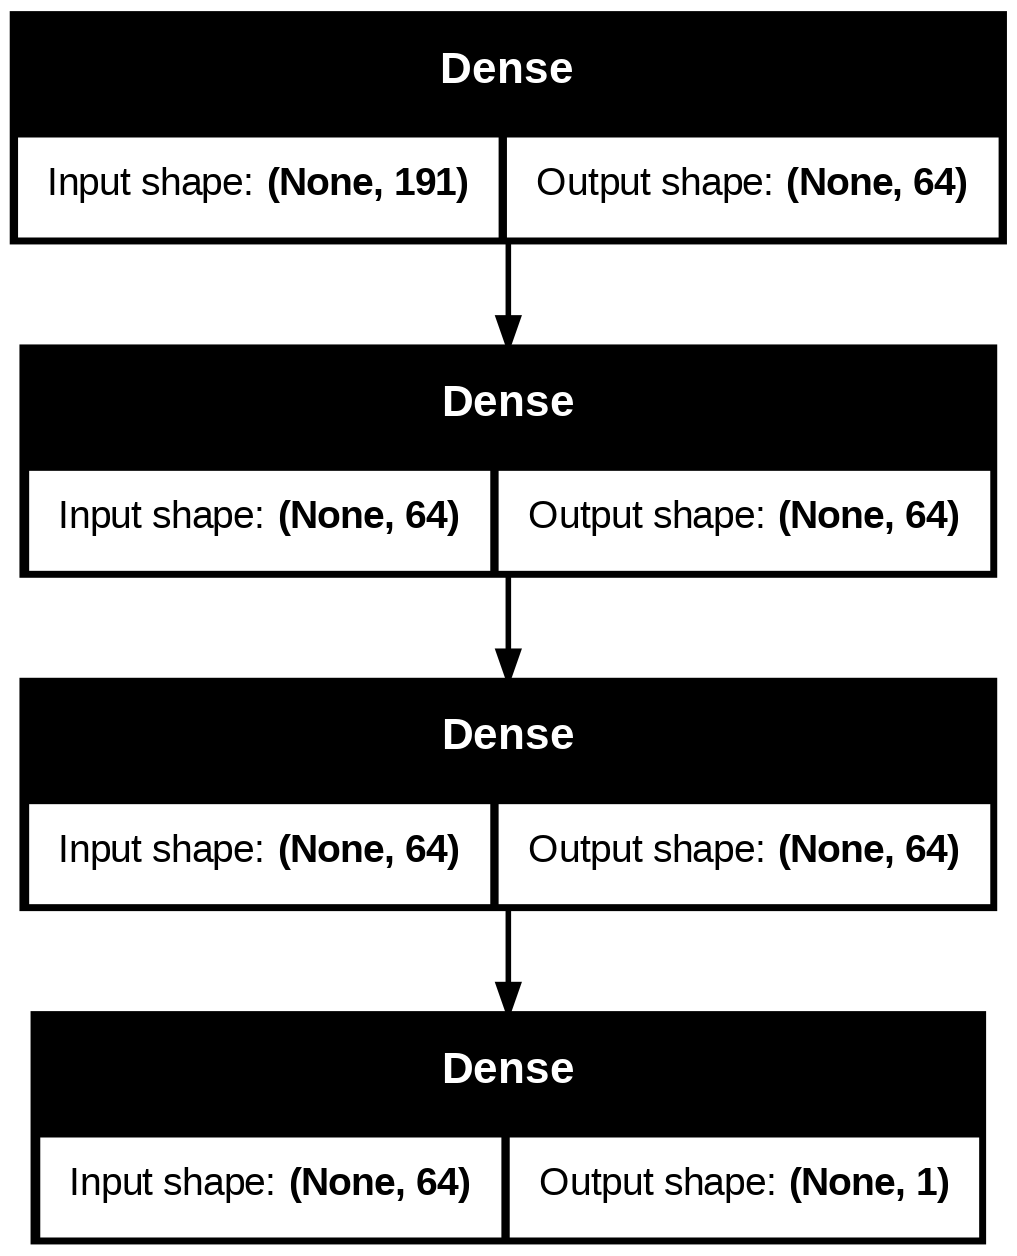

In [ ]:
tf.keras.utils.plot_model(model1, "UNSW_NB15_model1.png", show_shapes=True)

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 4932}

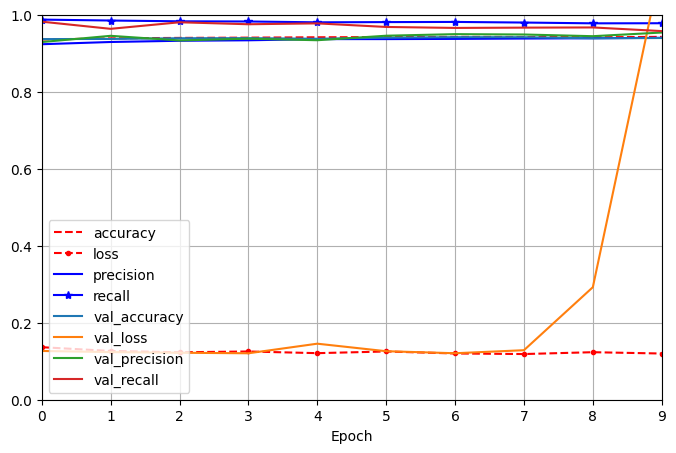

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert training history to DataFrame
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, len(history.history['accuracy']) - 1],  # Adjust to match the number of epochs
    ylim=[0, 1],  # Accuracy and loss are normalized between 0 and 1
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]  # Red for loss, blue for accuracy
)

# Add legend
plt.legend(loc="lower left")

# Show the plot
plt.show()

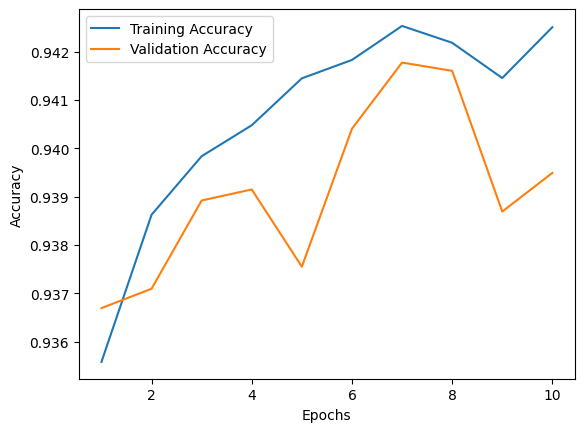

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model1.evaluate(X_test_prepared, y2_test_prepared)

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9265 - loss: 4.7769 - precision: 0.9526 - recall: 0.9368


[3.256443738937378, 0.8521959781646729, 0.8175011873245239, 0.9418070912361145]

In [ ]:
import tensorflow as tf
import keras_tuner as kt

def build_model():
    n_hidden = 6  # Number of hidden layers
    n_neurons = 32  # Neurons per layer
    learning_rate = 0.00905127409782462  # Predefined learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  # Optimizer set to SGD

    model2 = tf.keras.Sequential()
    model2.add(tf.keras.layers.InputLayer(shape=(191,)))  # Input layer for 191 features

    for _ in range(n_hidden):
        model2.add(tf.keras.layers.Dense(n_neurons, activation="relu"))  # Hidden layers

    model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model2.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),tf.keras.metrics.f1_score()]
    )

    return model2

model2 = build_model()
history2 = model2.fit(
    X_train_MLP, y2_train_MLP,
    epochs=10,
    batch_size=32,
    validation_data=(X_valid_MLP, y_valid_MLP)
)


Epoch 1/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8628 - loss: 0.3042 - precision_1: 0.8437 - recall_1: 0.9903 - val_accuracy: 0.9344 - val_loss: 0.1395 - val_precision_1: 0.9215 - val_recall_1: 0.9877
Epoch 2/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9377 - loss: 0.1334 - precision_1: 0.9332 - recall_1: 0.9787 - val_accuracy: 0.9381 - val_loss: 0.1305 - val_precision_1: 0.9231 - val_recall_1: 0.9915
Epoch 3/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9397 - loss: 0.1265 - precision_1: 0.9374 - recall_1: 0.9766 - val_accuracy: 0.9385 - val_loss: 0.1268 - val_precision_1: 0.9234 - val_recall_1: 0.9918
Epoch 4/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9403 - loss: 0.1235 - precision_1: 0.9386 - recall_1: 0.9763 - val_accuracy: 0.9385 - val_loss: 0.1250 - val_precision_1: 0.9237 - val_recall_1: 0.9915
Epoch 5/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9414 - loss: 0.1217 - precision_1: 0.9400 - rec

In [ ]:
model2.save('mlp_model2.h5')

In [ ]:
model2.evaluate(X_test_prepared, y2_test_prepared)

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9524 - loss: 0.1024 - precision_1: 0.9403 - recall_1: 0.9896


[0.2939007580280304,
 0.8332361578941345,
 0.7710663676261902,
 0.9915071129798889]

In [ ]:
import tensorflow as tf
import keras_tuner as kt

def build_model():
    n_hidden = 6  # Number of hidden layers
    n_neurons =  96 # Neurons per layer
    learning_rate = 0.0012482904754698163  # Predefined learning rate
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  # Optimizer set to SGD

    model3 = tf.keras.Sequential()
    model3.add(tf.keras.layers.InputLayer(shape=(191,)))  # Input layer for 191 features

    for _ in range(n_hidden):
        model3.add(tf.keras.layers.Dense(n_neurons, activation="relu"))  # Hidden layers

    model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model3.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.f1_score()]
    )

    return model3

model3 = build_model()
history3 = model3.fit(
    X_train_MLP, y2_train_MLP,
    epochs=10,
    batch_size=32,
    validation_data=(X_valid_MLP, y_valid_MLP)
)


Epoch 1/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7137 - loss: 0.5663 - precision_2: 0.7056 - recall_2: 0.9992 - val_accuracy: 0.9158 - val_loss: 0.2744 - val_precision_2: 0.8948 - val_recall_2: 0.9929
Epoch 2/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9212 - loss: 0.2287 - precision_2: 0.9004 - recall_2: 0.9944 - val_accuracy: 0.9313 - val_loss: 0.1724 - val_precision_2: 0.9134 - val_recall_2: 0.9931
Epoch 3/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9346 - loss: 0.1623 - precision_2: 0.9178 - recall_2: 0.9930 - val_accuracy: 0.9346 - val_loss: 0.1487 - val_precision_2: 0.9200 - val_recall_2: 0.9899
Epoch 4/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9364 - loss: 0.1424 - precision_2: 0.9249 - recall_2: 0.9869 - val_accuracy: 0.9341 - val_loss: 0.1380 - val_precision_2: 0.9235 - val_recall_2: 0.9846
Epoch 5/10
4932/4932 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9377 - loss: 0.1337 - precision_2: 0.9293 - rec

In [ ]:
model3.save('mlp_model3.h5')

In [ ]:
model3.evaluate(X_test_prepared, y2_test_prepared)

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9472 - loss: 0.1092 - precision_2: 0.9417 - recall_2: 0.9803


[0.2812468707561493,
 0.8366006016731262,
 0.7797335982322693,
 0.9801023602485657]